In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set_style('ticks')


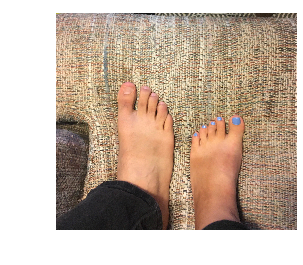

In [16]:
feet = cv2.cvtColor(cv2.imread('tanlines.jpg'),cv2.COLOR_BGR2RGB)
feet_gray = cv2.cvtColor(feet,cv2.COLOR_RGB2GRAY)

plt.imshow(feet,cmap = 'gray',vmin=0,vmax=255)
plt.axis('off')
plt.show()

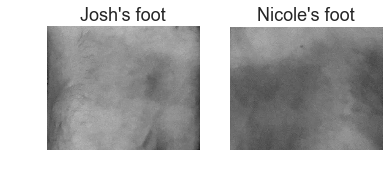

In [18]:
jz_foot = feet_gray[1330:1810,710:1300]
jz_foot_color = feet[1330:1810,710:1300]

nm_foot = feet_gray[1520:1885,1520:1970]
nm_foot_color = feet[1520:1885,1520:1970]

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(jz_foot, cmap='gray',vmin=100,vmax=255)
ax1.set_title("Josh's foot")
ax1.axis('off')
ax2.imshow(nm_foot, cmap='gray',vmin=100,vmax=255)
ax2.set_title("Nicole's foot")
ax2.axis('off')
plt.show()

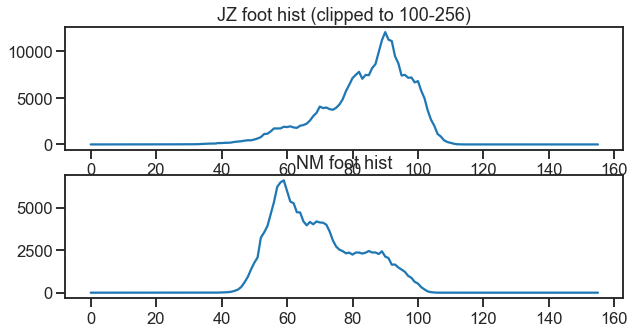

In [19]:
hist_jz = np.bincount(jz_foot.ravel(),minlength=256)
hist_nm = np.bincount(nm_foot.ravel(),minlength=256)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5))
ax1.plot(hist_jz[100:])
ax1.set_title('JZ foot hist (clipped to 100-256)')
ax2.plot(hist_nm[100:])
ax2.set_title('NM foot hist')
plt.show()

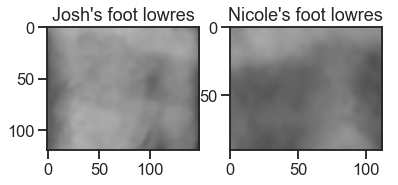

In [20]:
jz_foot_lowres = cv2.resize(jz_foot, None, 
                            fx = 0.25, fy = 0.25, 
                            interpolation = cv2.INTER_AREA)
jz_foot_lowres = cv2.GaussianBlur(jz_foot_lowres,(9,9),0)
nm_foot_lowres = cv2.resize(nm_foot, None, 
                            fx = 0.25, fy = 0.25, 
                            interpolation = cv2.INTER_AREA)
nm_foot_lowres = cv2.GaussianBlur(nm_foot_lowres,(9,9),0)

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(jz_foot_lowres, cmap='gray',vmin=100,vmax=255)
ax1.set_title("Josh's foot lowres")
ax2.imshow(nm_foot_lowres, cmap='gray',vmin=100,vmax=255)
ax2.set_title("Nicole's foot lowres")
plt.show()

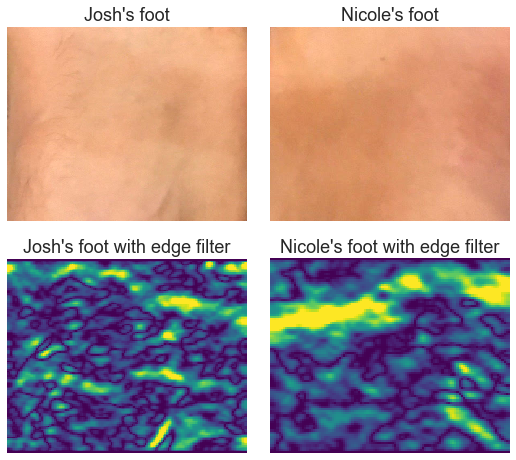

In [26]:
sns.set_context('talk')
jz_foot_sobely = cv2.Sobel(jz_foot_lowres,cv2.CV_16S,0,1,ksize=5)
nm_foot_sobely = cv2.Sobel(nm_foot_lowres,cv2.CV_16S,0,1,ksize=5)

size = 9
fig, [[ax11,ax12],[ax21,ax22]] = plt.subplots(2,2,figsize=(size,size))

ax11.imshow(jz_foot_color)
ax11.set_title("Josh's foot")
ax11.set_xticklabels([])
ax11.set_yticklabels([])
ax11.axis('off')

ax21.imshow(np.abs(jz_foot_sobely), cmap='viridis',vmin=0,vmax=256)
ax21.set_title("Josh's foot with edge filter")
ax21.set_xticklabels([])
ax21.set_yticklabels([])
ax21.axis('off')

ax12.imshow(nm_foot_color)
ax12.set_title("Nicole's foot")
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.axis('off')

ax22.imshow(np.abs(nm_foot_sobely), cmap='viridis',vmin=0,vmax=256)
ax22.set_title("Nicole's foot with edge filter")
ax22.set_xticklabels([])
ax22.set_yticklabels([])
ax22.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=-0.1)
plt.show()

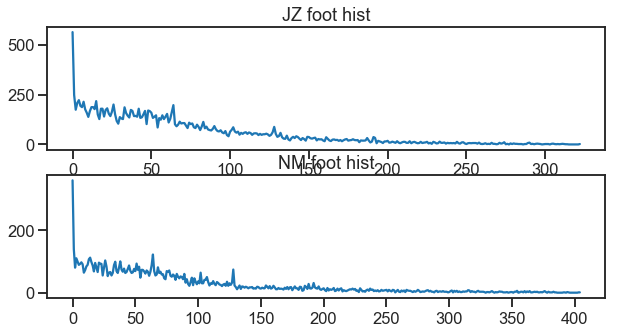

In [22]:
hist_jz_sobely = np.bincount(np.abs(jz_foot_sobely).ravel())
hist_nm_sobely = np.bincount(np.abs(nm_foot_sobely).ravel())

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5))
ax1.plot(hist_jz_sobely)
ax1.set_title('JZ foot hist')
ax2.plot(hist_nm_sobely)
ax2.set_title('NM foot hist')
plt.show()